In [8]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [9]:
import os

print("Maligno: ", len(os.listdir("data/dataset_raw/MINI-DDSM/binary_classification/maligno")))
print("Benigno: ", len(os.listdir("data/dataset_raw/MINI-DDSM/binary_classification/benigno")))

Maligno:  2716
Benigno:  2684


Found 4321 images belonging to 2 classes.
Found 1079 images belonging to 2 classes.


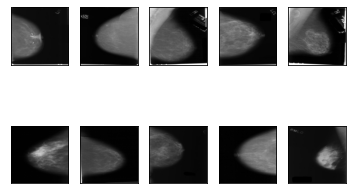

In [10]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=4,
    #     https://stackoverflow.com/questions/62484597/understanding-width-shift-range-and-height-shift-range-arguments-in-kerass
    #     width_shift_range = 0.05,
    #     height_shift_range = 0.05,
    # horizontal_flip=True,
    # https://stackoverflow.com/questions/57301330/what-exactly-the-shear-do-in-imagedatagenerator-of-keras
    # shear_range=2,
    #     preprocessing_function=gray_to_rgb,
    # zoom_range=[0.3, 0.5],
    validation_split=0.2  #20% para pruebas
)
# data/dataset_raw/MINI-DDSM/binary_classification/
#Generadores para sets de entrenamiento y pruebas
data_gen_train = datagen.flow_from_directory('data/dataset_raw/MINI-DDSM/binary_classification/',
                                             batch_size=32, shuffle=True, target_size=(224, 224),
                                             class_mode='categorical',
                                             subset='training')
# color_mode='grayscale'
data_gen_test = datagen.flow_from_directory('data/dataset_raw/MINI-DDSM/binary_classification/',
                                            batch_size=32, target_size=(224, 224), shuffle=True,
                                            class_mode='categorical',
                                            subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_train:
    for i in range(10):
        #         print(type(imagen))
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i])
    #         break
    break
plt.show()


In [11]:
from src.models.MobilNet2 import create_mobilNet

model = create_mobilNet()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 125442    
Total params: 2,383,426
Trainable params: 2,349,314
Non-trainable params: 34,112
_________________________________________________________________


In [12]:
# import tensorflow as tf
# import tensorflow_hub as hub

# url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

# #Congelar el modelo descargado
# mobilenetv2.trainable = False

# modelo = tf.keras.Sequential([
#     mobilenetv2,
#     tf.keras.layers.Dense(2, activation='softmax')
# ])

# modelo.summary()

In [13]:
from tensorflow.keras.optimizers import Adam, SGD

model.compile(SGD(learning_rate=1e-5), 'categorical_crossentropy', metrics=['accuracy'])
# 1e-5
# model.compile(
#     optimizer = 'adam',
#      loss='binary_crossentropy', # , categorical_crossentropy
#     metrics = ['accuracy']
# )

In [14]:
#Entrenar el modelo
EPOCAS = 15

historial = model.fit(
    data_gen_train, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_test
)

Epoch 1/15
136/136 [==============================] - 137s 976ms/step - loss: 1.1269 - accuracy: 0.4987 - val_loss: 1.0266 - val_accuracy: 0.5097

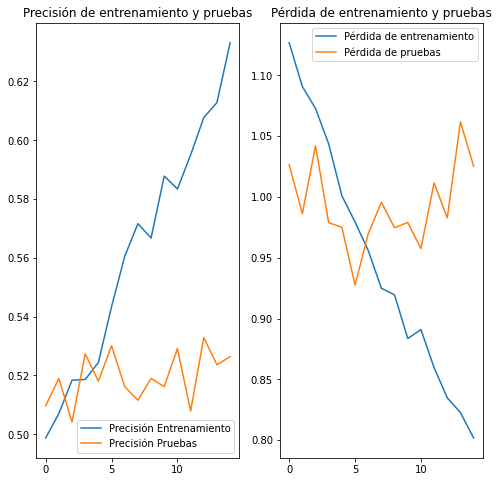

In [16]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [17]:
import pandas as pd
column_values = ['precision de train',
                 'precision de pruebas',
                 'perdida de train',
                 'perdida de pruebas']
array= list(zip(acc,val_acc,loss,val_loss))
df = pd.DataFrame(data = array,columns=column_values)
df

,precision de train,precision de pruebas,perdida de train,perdida de pruebas
0,0.498727,0.509731,1.126909,1.026593
1,0.507059,0.518999,1.090824,0.986275
2,0.518399,0.504171,1.072862,1.042085
3,0.518630,0.527340,1.043621,0.978871
4,0.524416,0.518072,1.001048,0.975169
5,0.543393,0.530120,0.979474,0.927564
6,0.560518,0.516219,0.956035,0.969685
7,0.571627,0.511585,0.924963,0.995760
8,0.566767,0.518999,0.919494,0.974673
9,0.587827,0.516219,0.883653,0.979135


In [18]:
df.describe()

,precision de train,precision de pruebas,perdida de train,perdida de pruebas
count,15.000000,15.000000,15.000000,15.000000
mean,0.561969,0.519432,0.947259,0.993014
std,0.041950,0.008721,0.102614,0.034814
min,0.498727,0.504171,0.801790,0.927564
25%,0.521523,0.513902,0.871673,0.974921
50%,0.566767,0.518999,0.924963,0.982846
75%,0.591414,0.526877,1.022334,1.018531
max,0.633187,0.532901,1.126909,1.061918


Reunión Profesor:
- Modificar los parametros del batch, taza de aprendisaje, recomienda que no congelemos los pesos
- Si o si usar data aumentation en el video indicar que parametros usar pero indica que resize no es bueno para la aumentación de datos
- Duplicar una arquitectura ya existente
- Estudiar cual es la caracteristica diferencial en las mamografias para que al momento de crear una arquitectura sepamos que convolusión es mejor o demos mas resalte como puede ser la forma la textura...
- Creo que hay un error en eso de convolusiones de poner mas a menos deberia ser al revez de menos a mas
